In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # for plottingp
torch.manual_seed(1) # set the random seed

# Fully-connected Neural Network

class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2
pigeon = Pigeon()

In [13]:
for w in pigeon.layer2.parameters():
    print(w)

Parameter containing:
tensor([[ 0.1372,  0.1251,  0.1249,  0.1743, -0.0149, -0.0816, -0.0954,  0.0263,
         -0.1813, -0.1654,  0.0336, -0.1031,  0.0232, -0.0043, -0.1502,  0.0396,
          0.1126,  0.1813, -0.0591,  0.1360, -0.1491,  0.1166, -0.1102, -0.0980,
          0.0192,  0.0422, -0.0400,  0.0573, -0.0854, -0.0637]],
       requires_grad=True)
Parameter containing:
tensor([-0.0425], requires_grad=True)


In [14]:
# Download the MNIST dataset

from torchvision import datasets, transforms

mnist_train = datasets.MNIST('data', train=True, download=True)

In [15]:
#  Use just the first 2000 data points today:
mnist_train = list(mnist_train)[:2000]

In [16]:
len(mnist_train)

2000

In [18]:
# Look at a few data points:
mnist_train[0][0]

In [19]:
mnist_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x111921550>, tensor(5))

In [20]:
mnist_train[1][0]

In [21]:
mnist_train[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x111921390>, tensor(0))

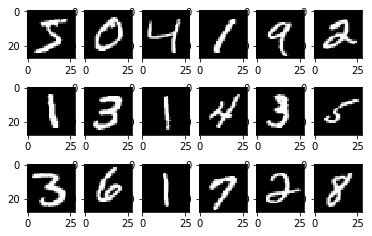

In [22]:
# plot the first 18 images in the training data
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image)

In [23]:
pigeon

Pigeon(
  (layer1): Linear(in_features=784, out_features=30, bias=True)
  (layer2): Linear(in_features=30, out_features=1, bias=True)
)

In [24]:
image

In [25]:
type(image)

PIL.Image.Image

In [26]:
img_to_tensor = transforms.ToTensor()

In [27]:
inval = img_to_tensor(image)

In [29]:
inval.shape

torch.Size([1, 28, 28])

In [32]:
logit = pigeon(inval)

In [33]:
torch.sigmoid(logit)

tensor([[0.4863]], grad_fn=<SigmoidBackward>)

In [40]:
for image, label in mnist_train[:2]:
    logit = pigeon(img_to_tensor(image))
    prob = torch.sigmoid(logit)
    print(float(prob))

0.5009106397628784
0.5218558311462402


In [41]:
# We use choose "loss function" to 
# compare the ground truth vs. the prediction

criterion = nn.BCEWithLogitsLoss()

In [43]:
for image, label in mnist_train[:2]:
    logit = pigeon(img_to_tensor(image))
    prob = torch.sigmoid(logit)
    
    actual = (label < 3).type(torch.FloatTensor).reshape([1,1])
    
    loss = criterion(logit, actual)
    print(float(loss))

0.6949701905250549
0.6503639221191406


In [45]:
# optimizer computes the changes to the weights & biases
# required to take a step towards reducing the loss

import torch.optim as optim
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

In [46]:
for image, label in mnist_train[:1000]:
    logit = pigeon(img_to_tensor(image))
    prob = torch.sigmoid(logit)
    
    actual = (label < 3).type(torch.FloatTensor).reshape([1,1])
    
    loss = criterion(logit, actual)
    
    loss.backward() # computes, for each weight/bias, the change
                    # to be made for that weight/bias
    optimizer.step() # actually updates the weights/biases
    optimizer.zero_grad() # does some cleanup
    

In [47]:
image

In [50]:
logit = pigeon(img_to_tensor(image))
prob = torch.sigmoid(logit)
print(prob)

tensor([[0.0876]], grad_fn=<SigmoidBackward>)


In [51]:
image, label = mnist_train[3]

In [52]:
image

In [53]:
logit = pigeon(img_to_tensor(image))
prob = torch.sigmoid(logit)
print(prob)

tensor([[0.9749]], grad_fn=<SigmoidBackward>)


In [54]:
error = 0
for (image, label) in mnist_train[:1000]: #<--- 1000 images
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
        
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.036
Training Accuracy: 0.964


In [55]:
error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
        
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.079
Test Accuracy: 0.921


In [60]:
pigeon2 = Pigeon()
optim2 = optim.SGD(pigeon2.parameters(), lr=0.005, momentum=0.9)

# training using 10 images

for k in range(1):
    for image, label in mnist_train[:10]: # <---
        logit = pigeon2(img_to_tensor(image))
        prob = torch.sigmoid(logit)

        actual = (label < 3).type(torch.FloatTensor).reshape([1,1])

        loss = criterion(logit, actual)

        loss.backward() # computes, for each weight/bias, the change
                        # to be made for that weight/bias
        optim2.step() # actually updates the weights/biases
        optim2.zero_grad() # does some cleanup


In [61]:
error = 0
for (image, label) in mnist_train[:10]:
    prob = torch.sigmoid(pigeon2(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
        
print("Training Error Rate:", error/10)
print("Training Accuracy:", 1 - error/10)

Training Error Rate: 0.0
Training Accuracy: 1.0


In [62]:
error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon2(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
        
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.291
Test Accuracy: 0.7090000000000001
